In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading "UK Optimal Product Price Prediction Dataset"
df = pd.read_csv("/Users/ZINA/Desktop/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [6]:
# Part 1: Understanding Product Categories

In [7]:
# 1. Frequency Tables:

In [8]:
# Generate a frequency table for the product category.
category_frequency = df['category'].value_counts()
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:
# Which are the top 5 most listed product categories?
top_5_categories = category_frequency.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [10]:
# 2. Visualizations:

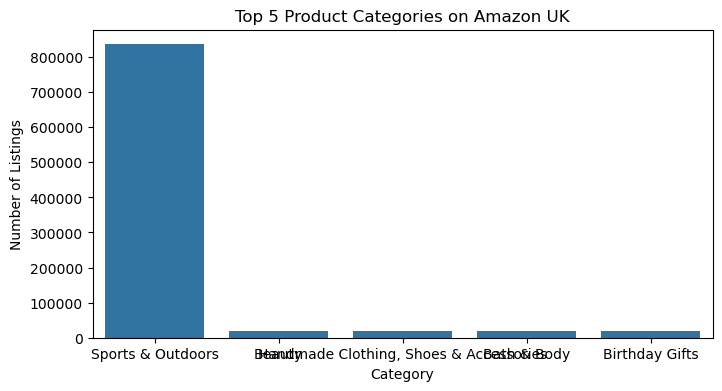

In [11]:
# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.
plt.figure(figsize=(8,4))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.title("Top 5 Product Categories on Amazon UK")
plt.show()

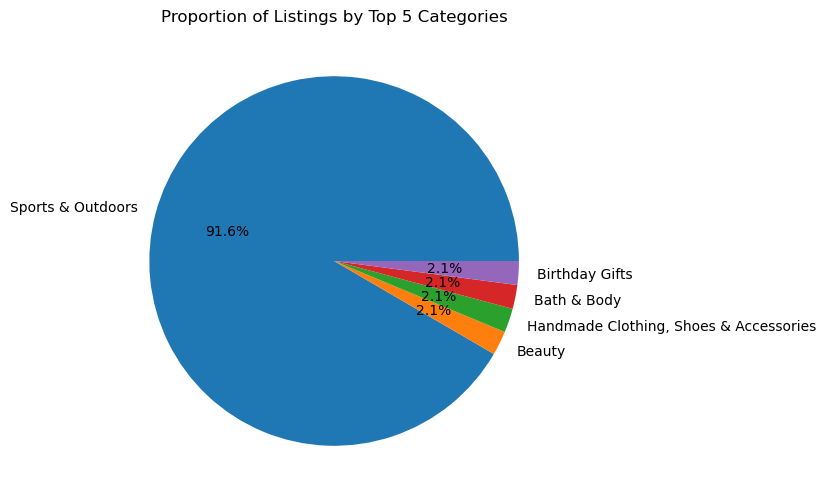

In [12]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
plt.figure(figsize=(6,6))
plt.pie(top_5_categories.values,labels=top_5_categories.index,autopct='%1.1f%%')
plt.title("Proportion of Listings by Top 5 Categories")
plt.show()

In [13]:
# Part 2: Delving into Product Pricing

In [14]:
# 1. Measures of Centrality:

In [15]:
# Calculate the mean, median, and mode for the price of products.
mean_price  = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
mean_price, median_price, mode_price

(np.float64(89.24380943923663), 19.09, np.float64(9.99))

In [16]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

# Answer: 
#the average price point of products = 89.24
#the most_common_price_point = 9.99
#the mean is much higher than the mode because it is strongly influenced by a small number of very expensive products, indicating right skewed price distribution

In [17]:
# 2. Measures of Dispersion:

In [18]:
# Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
interquartile_price = df['price'].quantile(0.75) - df['price'].quantile(0.25) 

variance_price, std_dev_price, range_price, interquartile_price

(119445.48532256528, 345.60886175352226, 100000.0, np.float64(36.0))

In [19]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

# Answer:
# there is a huge variation in the product prices; if we look at the average price = 89.24 and compare it with standard deviation = 345.60, indicating a significant spread in prices and presence of extreme high-priced outliers   

In [20]:
# 3. Visualizations:

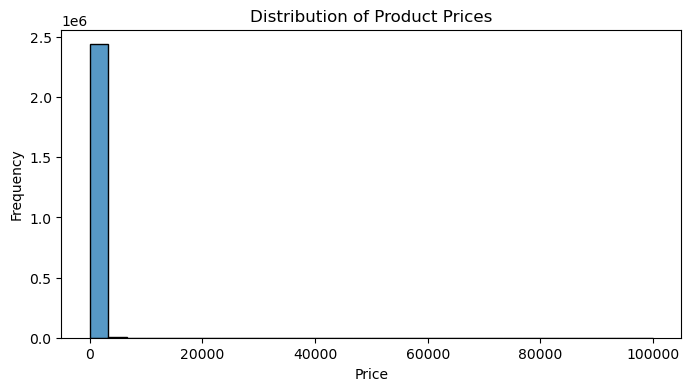

In [21]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()

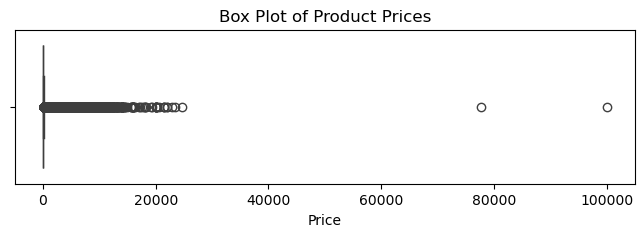

In [22]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
plt.figure(figsize=(8,2))
sns.boxplot(x=df['price'])
plt.xlabel("Price")
plt.title("Box Plot of Product Prices")
plt.show()

In [23]:
# Part 3: Unpacking Product Ratings

In [24]:
# 1. Measures of Centrality:

In [25]:
# Calculate the mean, median, and mode for the rating of products.
mean_rating  = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]
mean_rating, median_rating, mode_rating

(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [26]:
# How do customers generally rate products? Is there a common trend?
df['stars'].value_counts()

# Answer 
# 0 stars value is the most frequent value, this suggests that most products are unrated or recorded with zero rating 

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [27]:
# 2. Measures of Dispersion:

In [28]:
# Determine the variance, standard deviation, and interquartile range for product rating.
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
interquartile_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25) 

variance_rating, std_dev_rating, interquartile_rating

(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [29]:
# Are the ratings consistent, or is there a wide variation in customer feedback?
variance_rating, std_dev_rating, interquartile_rating
(4.81743402976196, 2.1948653785054697, np.float64(4.4))

# Answer 
# There is a moderate variation in customer ratings 

(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [30]:
# 3. Shape of the Distribution:

In [31]:
# Calculate the skewness and kurtosis for the rating column.
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

In [32]:
# Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_rating, kurtosis_rating
(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

# Answer 
# skewness of stars = 0.08 : approximately symmetric but not normally distributed
# kurtosis of stars = -1.926 : indicates a flat distribution, and the high frequency of zero ratings causes the distribution to lean toward lower values

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

In [33]:
# 4. Visualizations:

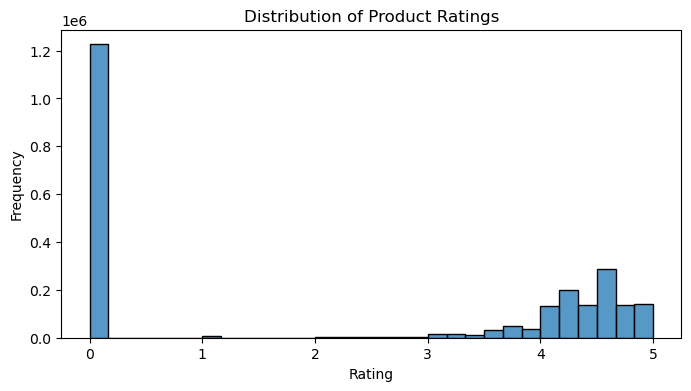

In [34]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
plt.figure(figsize=(8,4))
sns.histplot(df['stars'], bins=30)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Product Ratings")
plt.show()

# Answer : yes, 0 rating is by far the most common rating  